![snap](https://lever-client-logos.s3.amazonaws.com/2bd4cdf9-37f2-497f-9096-c2793296a75f-1568844229943.png)

# Librairies & Settings

In [1]:
# Standard Imports
import pandas as pd
import numpy as np
import openpyxl

# Viz
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import squarify
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

from math import pi
import warnings

pd.options.display.max_columns = 1000  # handy for showing truncated results
warnings.filterwarnings('ignore')


# Dataset Loading

## Delay Analysis

In [2]:
df_delay = pd.read_excel("https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_delay_analysis.xlsx",
                         engine='openpyxl', sheet_name='rentals_data')
df_delay_doc = pd.read_excel("https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_delay_analysis.xlsx",
                             engine='openpyxl', sheet_name='Documentation')
print(f"Observations : {df_delay.shape[0]}\n\nFeatures : {df_delay.shape[1]}")
display(df_delay.head())
display(df_delay.describe())
with pd.option_context('display.max_colwidth', None):
    display(df_delay_doc)


Observations : 21310

Features : 7


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN


,rental_id,car_id,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,16346.000000,1841.000000,1841.000000
mean,549712.880338,350030.603426,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,67.000000,560823.000000,540.000000
max,576401.000000,417675.000000,71084.000000,575053.000000,720.000000


,field name,Comment
0,rental_id,Unique identifier of the rental
1,car_id,Unique identifier of the car
2,checkin_type,"Flow used for both checkin and checkout. (ie. access and return the car)\nmobile = rental agreement signed on the owner's smartphone\nconnect = car equiped with the Connect technology , opened by the driver with his smartphone.\nNote: paper contracts were excluded from the data as we have no data on their delay at checkout and it's negligible use case"
3,state,canceled means that the rental did not happen (was canceled by the driver or the owner).
4,delay_at_checkout_in_minutes,Difference in minutes between the rental end time requested by the driver when booking the car and the actual time the driver completed the checkout. Negative values mean that the driver returned the car in advance.
5,previous_ended_rental_id,id of the previous ended rental of the car (NULL when no previous rental or delay with previous rental higher than 12 hours)
6,time_delta_with_previous_rental_in_minutes,"Difference in minutes between this rental planned start time and the previous rental planned end time (when lower than 12 hours, NULL if higher)"


## Pricing Project

In [3]:
df_pricing = pd.read_csv(
    "https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_pricing_project.csv", index_col=0)
print(
    f"Observations : {df_pricing.shape[0]}\n\nFeatures : {df_pricing.shape[1]}")
display(df_pricing.head())
display(df_pricing.describe())


Observations : 4843

Features : 14


,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


,mileage,engine_power,rental_price_per_day
count,4.843000e+03,4843.00000,4843.000000
mean,1.409628e+05,128.98823,121.214536
std,6.019674e+04,38.99336,33.568268
min,-6.400000e+01,0.00000,10.000000
25%,1.029135e+05,100.00000,104.000000
50%,1.410800e+05,120.00000,119.000000
75%,1.751955e+05,135.00000,136.000000
max,1.000376e+06,423.00000,422.000000


# 🔍 EDA - Exploratory Data Analysis 🔎
First we are going to clean our dataset, by removing no relevant and unused features for our analysis.

## Delay

## Are there any missing values?

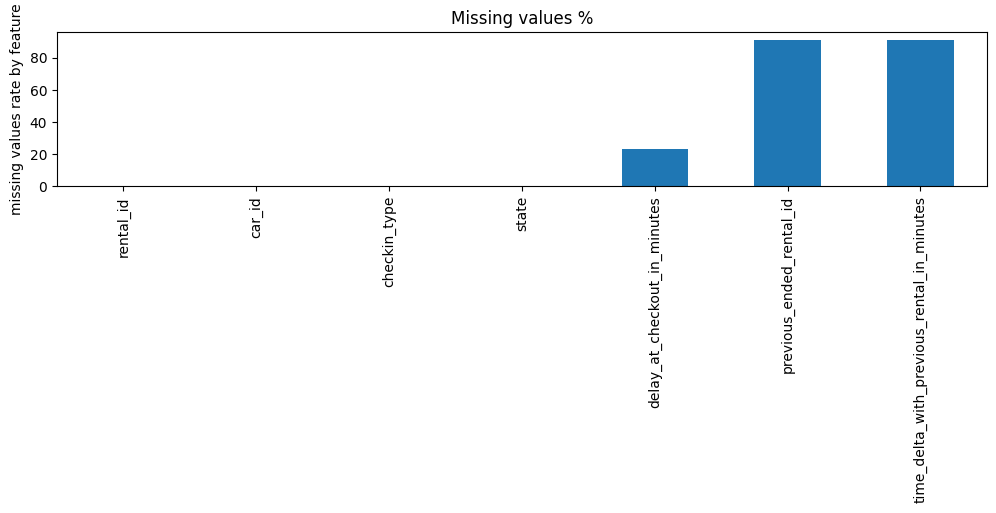

In [4]:
(df_delay.isna().mean().sort_values()*100).plot(
    kind="bar", figsize=(12, 2),
    title="Missing values %",
    ylabel="missing values rate by feature")
plt.show()


We need to be accurate with delay at checkout, so I remove all Nan values for this feature

In [5]:
canceled_drive = df_delay["state"].value_counts()[1]
canceled_drive

3265

In [6]:
df_delay.dropna(subset=['delay_at_checkout_in_minutes'], inplace=True)


In [7]:
df_delay.groupby(by="state")["checkin_type"].value_counts()


state     checkin_type
canceled  mobile              1
ended     mobile          12943
          connect          3402
Name: checkin_type, dtype: int64

After droping all NaN values, it's still have 1 last useless value that concerne canceled state. I remove it

<AxesSubplot: xlabel='state,checkin_type'>

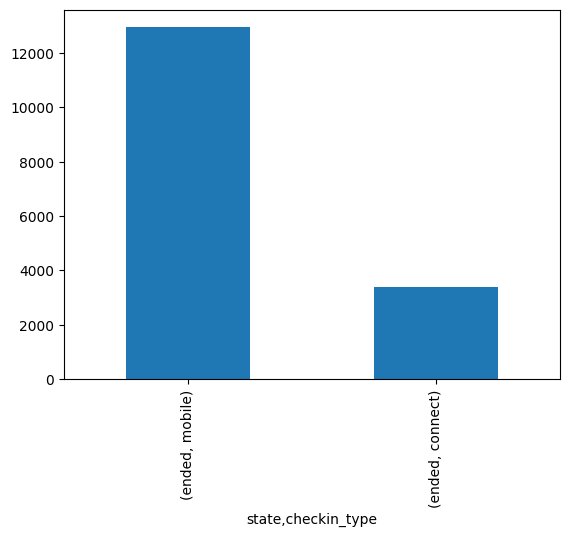

In [8]:
canceled = df_delay["state"] == "canceled"
df_canceled = df_delay[canceled]
df_delay = df_delay[~canceled]
df_delay.groupby(by="state")["checkin_type"].value_counts().plot(kind="bar")


## Which checkin_Type is mostly concerned by delays ?

In [9]:
checkout = []
for x in df_delay['delay_at_checkout_in_minutes']:
    if x < 0:
        checkout.append('Early')
    elif x < 15:
        checkout.append('Late 0-15 mins')
    elif x < 30:
        checkout.append('Late 15-30 mins')
    elif x < 60:
        checkout.append('Late 30-60 mins')
    elif x < 120:
        checkout.append('Late 1-2 hours')
    elif x >= 120:
        checkout.append('Late > 2 hours')
    else:
        checkout.append('NA')
df_delay['checkout'] = checkout
df_delay.head()


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,checkout
1,507750,269550,mobile,ended,-81.0,NaN,NaN,Early
2,508131,359049,connect,ended,70.0,NaN,NaN,Late 1-2 hours
5,511626,398802,mobile,ended,-203.0,NaN,NaN,Early
6,511639,370585,connect,ended,-15.0,563782.0,570.0,Early
7,512303,371242,mobile,ended,-44.0,NaN,NaN,Early



Description of data distribution

Early              6819
Late > 2 hours     2568
Late 0-15 mins     2003
Late 1-2 hours     1860
Late 30-60 mins    1722
Late 15-30 mins    1373
Name: checkout, dtype: int64

Plotted distribution



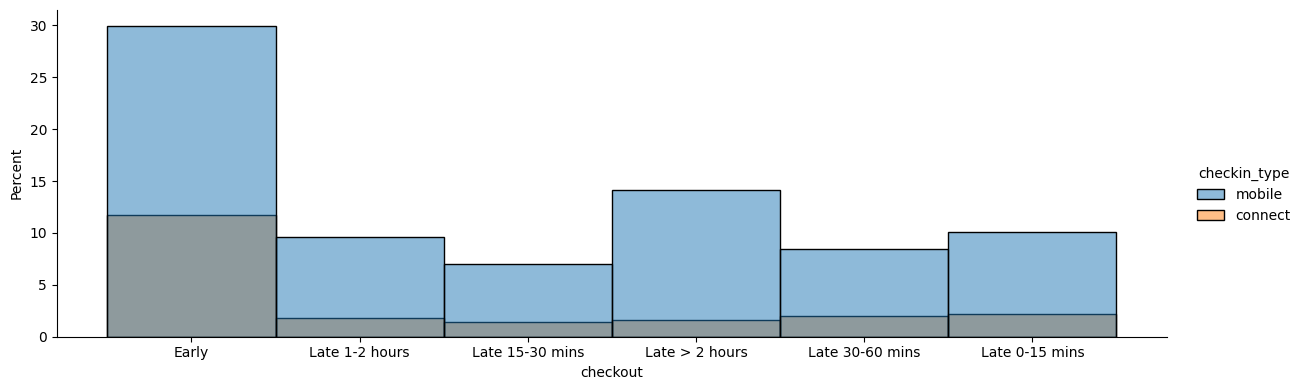

In [10]:
print('\nDescription of data distribution\n')
print(df_delay['checkout'].value_counts())
print('\nPlotted distribution\n')
sb.displot(df_delay, x='checkout', stat='percent',
           hue='checkin_type',  height=4., aspect=3.)
plt.show()


As you can see, the mobile checkin_Type is the most concerned by the delays (that require the presence of owner + driver)

## How delays are distributed and is there some outliers ?

Notes : 

There are 1 440 minutes in 1 day, so I think we can ignore cases with delay > 1440 minutes that represente 1 day of delay.
I go to 1440 because it's possible to have rare cases where driver had some problems and didn't be able to bring back the car on time
I go to -1440 because it's possible that the driver need or want to bring back the vehicule sooner.


Description of data distribution

count    16345.000000
mean        60.773876
std        993.173222
min     -22433.000000
25%        -36.000000
50%          9.000000
75%         67.000000
max      71084.000000
Name: delay_at_checkout_in_minutes, dtype: float64

Plotted distribution



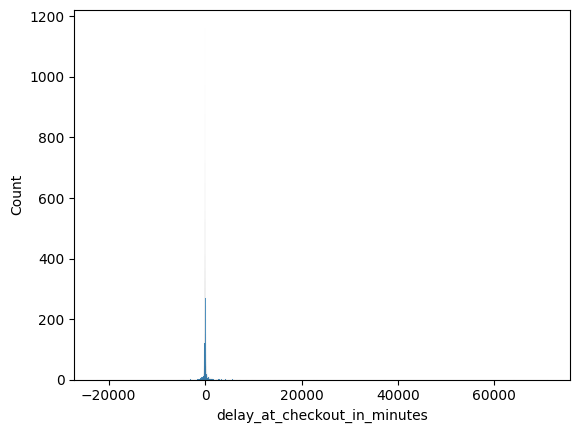

In [11]:
# let's focus on central values
print('\nDescription of data distribution\n')
print(df_delay.loc[:, "delay_at_checkout_in_minutes"].describe())
print('\nPlotted distribution\n')
sb.histplot(df_delay, x="delay_at_checkout_in_minutes")
plt.show()



Description of data distribution

count    16116.000000
mean        20.953338
std        228.794268
min      -1438.000000
25%        -37.000000
50%          9.000000
75%         64.000000
max       1434.000000
Name: delay_at_checkout_in_minutes, dtype: float64

Plotted distribution



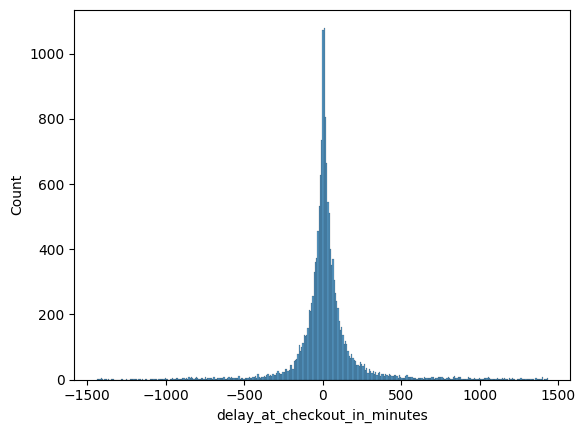

In [12]:
# let's concentrate on central values
max = df_delay["delay_at_checkout_in_minutes"] < 1440.  # 24 hours
min = df_delay["delay_at_checkout_in_minutes"] > -1440.  # 24 hours
print('\nDescription of data distribution\n')
print(df_delay.loc[min & max, "delay_at_checkout_in_minutes"].describe())
print('\nPlotted distribution\n')
sb.histplot(df_delay.loc[min & max, :], x="delay_at_checkout_in_minutes")
plt.show()


This is the destribution with a subjective choice of 1 day of positive/negative delay, we kept 16 116 lines of our dataset.

Let's check with more scientific methode, for the next distribution I will remove 1% of each extrimity. So I will keep 98% centrales values

Taking central 98% data


Description of data distribution

count    16016.000000
mean        31.765297
std        214.883059
min       -852.000000
25%        -35.000000
50%          9.000000
75%         65.000000
max       1490.000000
Name: delay_at_checkout_in_minutes, dtype: float64

Plotted distribution



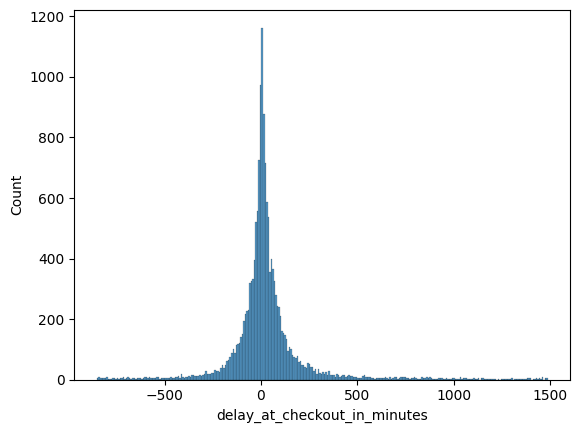

In [13]:
min = df_delay["delay_at_checkout_in_minutes"] <= df_delay["delay_at_checkout_in_minutes"].quantile(0.01)
max = df_delay["delay_at_checkout_in_minutes"] >= df_delay["delay_at_checkout_in_minutes"].quantile(0.99)

print('Taking central 98% data\n')
df_delay_bis = df_delay.loc[~ (min | max), :]

print('\nDescription of data distribution\n')
print(df_delay_bis.loc[:, "delay_at_checkout_in_minutes"].describe())
print('\nPlotted distribution\n')
sb.histplot(df_delay_bis.loc[:, :], x="delay_at_checkout_in_minutes")
plt.show()

In both methode we get aproximatively the same result in our distribution. The question is, is it possible to have cases where owner/driver had some issues and didn't come to the appointment ? (In this case, is driver will be charged, if he is at fault ?)

many points to clear


## What about treshold ?

Let's keep only Positive delay in a new dataframe

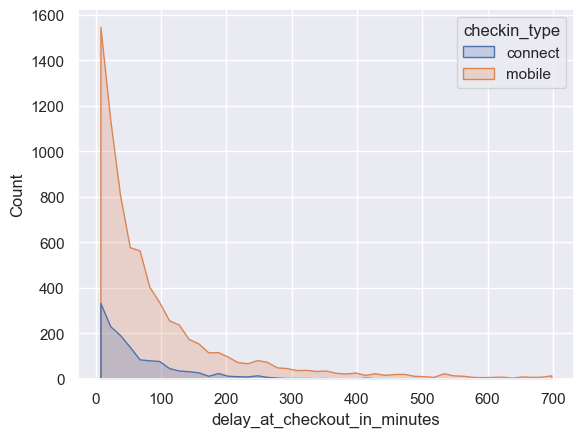

In [14]:
late_drivers = df_delay_bis["delay_at_checkout_in_minutes"] > 0
df_late_drivers = df_delay_bis[late_drivers]
sb.set(style="darkgrid")
sb.histplot(data=df_late_drivers, x="delay_at_checkout_in_minutes", hue="checkin_type", element="poly", bins=np.arange(0, 60*12, step=15)) ## (60*12) for 12 hours
plt.show()


As we can see, most of the delays are under 120-180 minutes

## Can we estimate money lost due to the delays?

In [15]:
df_late_drivers_mobile = df_late_drivers[df_late_drivers["checkin_type"] == "mobile"]
df_late_drivers_connect = df_late_drivers[df_late_drivers["checkin_type"] == "connect"]
delay_median_mobile = np.median(df_late_drivers_mobile["delay_at_checkout_in_minutes"])
delay_median_connect = np.median(df_late_drivers_connect["delay_at_checkout_in_minutes"])

## Mobile Checkin Type

In [16]:
nb_delays = len(df_late_drivers_mobile)
print(f"{nb_delays} are concerned by delays (short/long)")
delay_median_mobile = np.median(df_late_drivers_mobile["delay_at_checkout_in_minutes"])
print(f"the delay is about : {delay_median_mobile} minutes")
avg_price_rent_by_day = np.mean(df_pricing["rental_price_per_day"]) ## price by day
print(f"Plus we know that the average price of car rent is about : {avg_price_rent_by_day}$ by day")
avg_price_rent_by_min = avg_price_rent_by_day / 1_440
print(f"That represent : {round(avg_price_rent_by_min, ndigits=3)} $ by minute")
money_loss = avg_price_rent_by_min * delay_median_mobile
print(f"so getaround loss about {money_loss} $ for each delay")
print(f"so getaround loss about {money_loss * nb_delays} $ for {nb_delays} delays")


7781 are concerned by delays (short/long)
the delay is about : 54.0 minutes
Plus we know that the average price of car rent is about : 121.21453644435267$ by day
That represent : 0.084 $ by minute
so getaround loss about 4.5455451166632255 $ for each delay
so getaround loss about 35368.88655275656 $ for 7781 delays


## Connect Checkin Type

In [17]:
nb_delays = len(df_late_drivers_connect)
print(f"{nb_delays} are concerned by delays (short/long)")
delay_median_connect = np.median(df_late_drivers_connect["delay_at_checkout_in_minutes"])
print(f"the delay is about : {delay_median_connect} minutes")
avg_price_rent_by_day = np.mean(df_pricing["rental_price_per_day"]) ## price by day
print(f"Plus we know that the average price of car rent is about : {avg_price_rent_by_day}$ by day")
avg_price_rent_by_min = avg_price_rent_by_day / 1_440
print(f"That represent : {round(avg_price_rent_by_min, ndigits=3)} $ by minute")
money_loss = avg_price_rent_by_min * delay_median_connect
print(f"so getaround loss about {money_loss} $ for each delay")
print(f"so getaround loss about {money_loss * nb_delays} $ for {nb_delays} delays")


1459 are concerned by delays (short/long)
the delay is about : 41.0 minutes
Plus we know that the average price of car rent is about : 121.21453644435267$ by day
That represent : 0.084 $ by minute
so getaround loss about 3.4512472182072638 $ for each delay
so getaround loss about 5035.369691364398 $ for 1459 delays


Actually we have no information about when the cars have been rent, and what time periode is concerned by those 9240 delays. 
It could be 1 day, 1 week, 1 month or 1 year time period.

nevermind, by now they have an approximation by minutes.

In all cases, Getaround should focus on mobile checkin type that represent the main loss of money without treshold